## Imports

In [2]:
import sys
import os
from PIL import Image, ExifTags
import pathlib
import torch
import numpy as np

In [3]:
sys.path.append(next(pathlib.Path(os.getcwd()).joinpath('dlib').glob('dist/*.egg')).as_posix())
sys.path.append(pathlib.Path(os.getcwd(), 'face_recognition_models').as_posix())
sys.path.append(pathlib.Path(os.getcwd(), 'face_recognition').as_posix())

In [4]:
import face_recognition

In [5]:
ORIENTATION_FLAG = [k for k, v in ExifTags.TAGS.items() if v == "Orientation"][0]
im_path = 'assets/viji.jpg'

def rotate_image(image: Image):
    exif = image.getexif()

    if ORIENTATION_FLAG not in exif:
        return image
    elif exif[ORIENTATION_FLAG] == 3:
        image = image.rotate(180, expand=True)
    elif exif[ORIENTATION_FLAG] == 6:
        image = image.rotate(270, expand=True)
    elif exif[ORIENTATION_FLAG] == 8:
        image = image.rotate(90, expand=True)

    return image

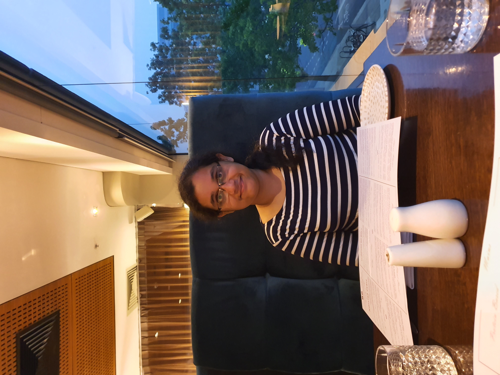

In [14]:
image = Image.open(im_path)
image.thumbnail((500, 500))
display(image)

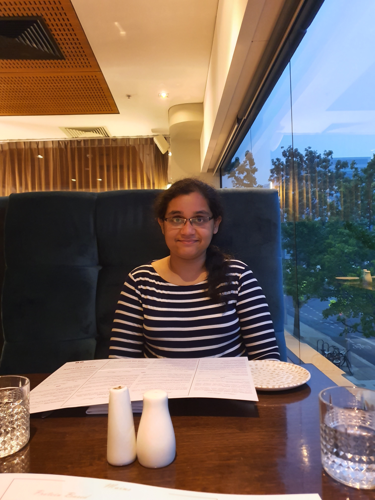

In [15]:
image = Image.open(im_path)
image = rotate_image(image)
image.thumbnail((500, 500))
display(image)

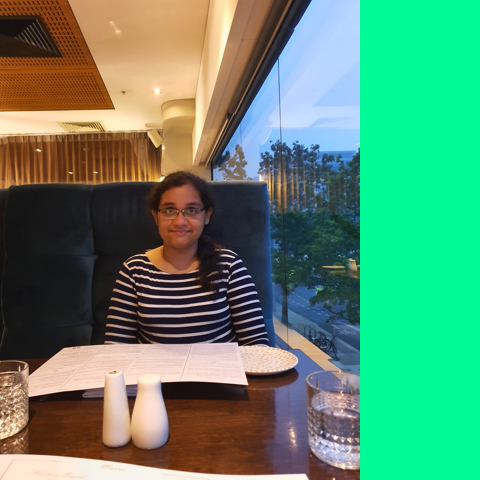

In [6]:
MAX_WIDTH = 480
MAX_HEIGHT = 480

image = Image.open(im_path).convert("RGB")
image = rotate_image(image)
ratio = min(MAX_WIDTH / image.width, MAX_HEIGHT / image.height)

if ratio < 1:
    image = image.resize(
        (round(image.width * ratio), round(image.height * ratio))
    )
    
def pad_image(image: Image, width, height, color=(0, 250, 150)):
    padded_image = Image.new(image.mode, (width, height), color)
    padded_image.paste(image, (0, 0))
    
    return padded_image

image = pad_image(image, MAX_WIDTH, MAX_HEIGHT)
display(image)

In [16]:
image = Image.open(im_path).convert("RGB")
image = rotate_image(image)
face_recognition.face_locations(np.array(image))

[(1632, 1734, 2094, 1272)]

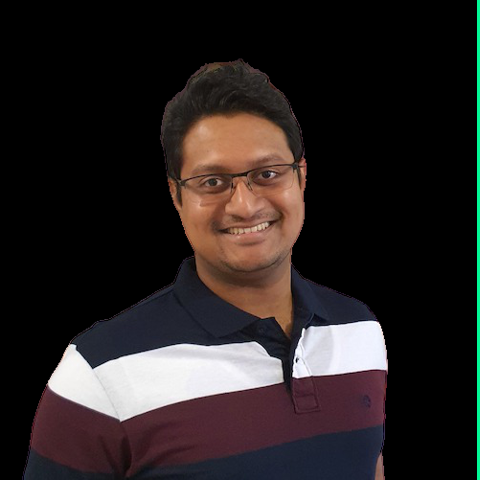

In [10]:
image_1 = Image.open('assets/me.png').convert("RGB")
image_1.thumbnail((MAX_WIDTH, MAX_HEIGHT))
image_1 = pad_image(image_1, MAX_WIDTH, MAX_HEIGHT)
display(image_1)

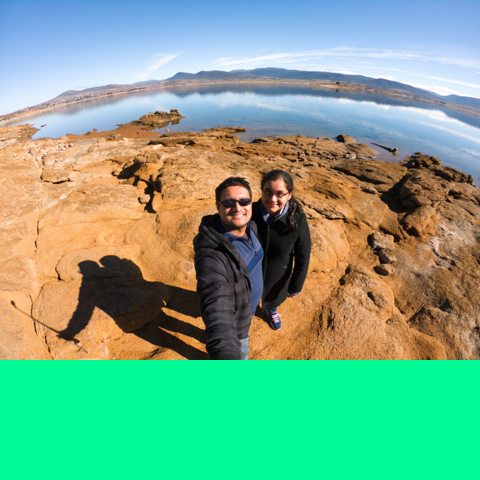

In [12]:
image_2 = Image.open('assets/me_viji.jpg').convert("RGB")
image_2.thumbnail((MAX_WIDTH, MAX_HEIGHT))
image_2 = pad_image(image_2, MAX_WIDTH, MAX_HEIGHT)
display(image_2)

In [14]:
face_recognition.batch_face_locations([np.array(image_1), np.array(image_2)])

[[(136, 300, 254, 182)], [(185, 252, 225, 213)]]